# Lab 12-6

0 89.647964
1 51.29313
2 25.848797
3 12.316919
4 9.075374
5 12.283626
6 16.217884
7 17.116573
8 14.834475
9 10.957237
10 7.1024737
11 4.28809
12 2.8619783
13 2.660201
14 3.2372284
15 4.080591
16 4.764346
17 5.0280046
18 4.791026
19 4.125844
20 3.2101498
21 2.2700915
22 1.5204489
23 1.1088488
24 1.0757886
25 1.3450084
26 1.7535522
27 2.1150184
28 2.2900774
29 2.2314212
30 1.9850789
31 1.6550126
32 1.3535818
33 1.1604329
34 1.102592
35 1.1572527
36 1.2704997
37 1.3816772
38 1.4441007
39 1.4366041
40 1.3648033
41 1.2541937
42 1.1387882
43 1.0492432
44 1.0038222
45 1.0043991
46 1.038165
47 1.0839337
48 1.1204858
49 1.1338054
50 1.120723
51 1.0881245
52 1.0486945
53 1.0153514
54 0.9966237
55 0.9944452
56 1.004672
57 1.0196143
58 1.0313288
59 1.034417
60 1.0274876
61 1.0130054
62 0.99582875
63 0.9811127
64 0.97239316
65 0.9705095
66 0.97367686
67 0.978549
68 0.98175436
69 0.9812304
70 0.97684175
71 0.9701198
72 0.9633558
73 0.9585233
74 0.9565063
75 0.95690507
76 0.958411
77 0.9594948
78 0.9

594 0.5384636
595 0.53810996
596 0.53775686
597 0.5374047
598 0.53705335
599 0.5367028
600 0.5363532
601 0.5360043
602 0.5356561
603 0.5353087
604 0.53496206
605 0.5346162
606 0.53427106
607 0.53392667
608 0.53358316
609 0.5332402
610 0.532898
611 0.53255665
612 0.53221583
613 0.53187585
614 0.5315366
615 0.53119797
616 0.5308601
617 0.5305228
618 0.53018624
619 0.52985036
620 0.52951515
621 0.52918065
622 0.5288467
623 0.52851355
624 0.5281809
625 0.52784896
626 0.5275177
627 0.52718705
628 0.526857
629 0.52652764
630 0.5261988
631 0.52587056
632 0.5255431
633 0.525216
634 0.52488977
635 0.524564
636 0.5242388
637 0.52391434
638 0.5235903
639 0.5232669
640 0.5229441
641 0.52262187
642 0.52230024
643 0.5219793
644 0.52165854
645 0.5213386
646 0.5210192
647 0.5207004
648 0.52038205
649 0.52006423
650 0.5197471
651 0.5194304
652 0.5191143
653 0.5187987
654 0.5184836
655 0.51816905
656 0.51785505
657 0.5175415
658 0.51722866
659 0.51691616
660 0.5166042
661 0.51629275
662 0.5159818
663 0.

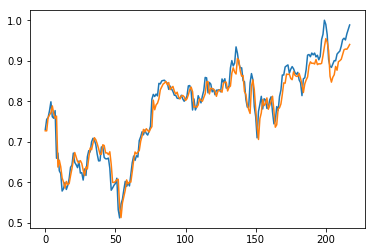

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1

xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]
xy = MinMaxScaler(feature_range=(0,1)).fit_transform(xy)
x = xy
y = xy[:, [-1]]

dataX = []
dataY = []
for i in range(len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]
    
    dataX.append(_x)
    dataY.append(_y)
    
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[:train_size]), np.array(dataY[train_size:len(dataY)])

X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True)
with tf.variable_scope('rnn', reuse=tf.AUTO_REUSE) as scope:
    outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32, scope=scope)
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)

loss = tf.reduce_sum(tf.square(Y_pred - Y))
with tf.variable_scope('adam', reuse=tf.AUTO_REUSE):
    train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(1000):
        _, l = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        print(i, l)
        
    testPredict = sess.run(Y_pred, feed_dict={X: testX})
    
    plt.plot(testY)
    plt.plot(testPredict)
    plt.show()